In [58]:
from keras.datasets import mnist
(x_train , y_train), (x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
y_train.shape

(60000, 28, 28)
(10000, 28, 28)
(10000,)


(60000,)

In [59]:
import numpy as np
x_train_vec = x_train.reshape(60000,784)
x_test_vec = x_test.reshape(10000,784)
print(x_test_vec.shape)
print(x_train_vec.shape)

(10000, 784)
(60000, 784)


In [60]:
def one_hot_enc(labels, dimensions = 10):
    results = np.zeros((len(labels),dimensions))
    for i,label in enumerate(labels):
        results[i,label] = 1
    return results

y_train_vec = one_hot_enc(y_train)
y_test_vec = one_hot_enc(y_test)

print(y_test_vec.shape)
print(y_train_vec.shape)

(10000, 10)
(60000, 10)


In [61]:
randomise = np.random.permutation(60000)
train_vec = randomise[:50000]
valid_vec = randomise[50000:]

x_validation = x_train_vec[valid_vec]
y_validation = y_train_vec[valid_vec]

x_train_vec = x_train_vec[train_vec]
y_train_vec = y_train_vec[train_vec]

print("Shape of x_valid_vec is", x_validation.shape)
print("Shape of y_valid_vec is", y_validation.shape)

Shape of x_valid_vec is (10000, 784)
Shape of y_valid_vec is (10000, 10)


BUILDING NEURAL NETWORK

In [62]:
from keras import models
from keras import layers

In [63]:
d1 = 500
d2 = 500

In [64]:
model = models.Sequential()

model.add(layers.Dense(d1,activation='relu',input_shape = (784,)))
model.add(layers.Dense(d2,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

c:\Users\abdul\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


OPTIMISATION

In [65]:
from keras import optimizers
model.compile(optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [66]:
history = model.fit(x_train_vec,y_train_vec, epochs = 50, batch_size= 128, validation_data=(x_validation,y_validation))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7506 - loss: 8.7708 - val_accuracy: 0.9169 - val_loss: 1.7622
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9388 - loss: 1.0522 - val_accuracy: 0.9331 - val_loss: 1.2339
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9598 - loss: 0.5499 - val_accuracy: 0.9419 - val_loss: 1.0507
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9749 - loss: 0.2803 - val_accuracy: 0.9459 - val_loss: 0.9994
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9791 - loss: 0.1908 - val_accuracy: 0.9541 - val_loss: 0.9063
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9851 - loss: 0.1277 - val_accuracy: 0.9496 - val_loss: 0.9730
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9899 - loss: 0.0795 - val_accuracy: 0.9544 - val_loss: 0.8761
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9900 - loss: 0.0789 - val_accuracy: 0.

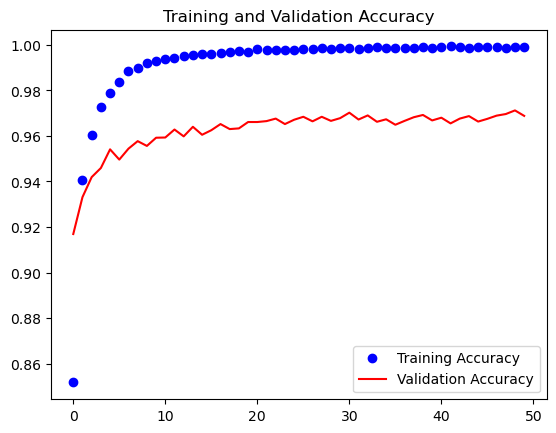

In [67]:
import matplotlib.pyplot as plt 
%matplotlib inline

epochs = range(50)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, train_acc, 'bo', label = "Training Accuracy")
plt.plot(epochs, val_acc, 'r', label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

EVALUTAION

In [68]:
loss_and_acc = model.evaluate(x_test_vec,y_test_vec)
loss_and_acc

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9655 - loss: 0.7693


[0.6137325763702393, 0.972000002861023]

In [69]:
print("Test loss is :", loss_and_acc[0])
print("Test accuracy is :", loss_and_acc[1])

Test loss is : 0.6137325763702393
Test accuracy is : 0.972000002861023


nice